In [26]:

import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from api_keys import weather_api_key
#from api_keys import tmdb_key

from citipy import citipy
from datetime import datetime

import scipy.stats as st
from scipy.stats import linregress


In [27]:

#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]
city_count_input = input("how many cities data do you want to gather?")
while len(rndlat) < int(city_count_input):
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 
lat_long_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
lat_long_df.head()

how many cities data do you want to gather?1250


,lat,lon
0,61.911581,83.792891
1,-81.922446,-15.638564
2,-83.847384,155.104720
3,73.473034,33.793768
4,2.177216,-88.847827


In [28]:
#get nearest city from the random genereated lat and long values inside dataframe geo_df
city = []
country = []


for index, row in lat_long_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
#Display city and country names
city_df.head()


,city,country
0,togur,ru
1,cape town,za
2,bluff,nz
3,vardo,no
4,puerto baquerizo moreno,ec


In [29]:
# get the no of cities in the datafram to processed to the weather api 
city_df.count()


city       1250
country    1250
dtype: int64

In [30]:
city_weather_data=[]
#make API call to weather data and collect the data returened via json calls and handles exceptions appropriately
weather_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="
#rate_limiter = RateLimiter(max_calls=50, period=60)
query_url
for index, row in city_df.iterrows():
    #print("hello")
    city_q=row["city"]
    print(city_q)
    response = requests.get(query_url + city_q).json()
    #print(response)
    try:
        temp=response["main"]["temp"]
        humid=response["main"]["humidity"]
        cloud=response["clouds"]["all"]
        wind=response["wind"]["speed"]
        city_lat=response["coord"]["lat"]
        city_lon=response["coord"]["lon"]
        city_name=response["name"]
        city_country=response["sys"]["country"]
        city_weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,"longitude": city_lon,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
        print (f"Processing record #{index+1} -- {city_q}")
        print (f'{weather_url}appid={weather_api_key}&units={units}&q={city_q}')
        #query_dtl =query_url +city_q
        #print (query_dtl)
        print ("----------------------------------------------------------------")
    except:
        print (f"Weather for {city_q} not found.")
        print ("----------------------------------------------------------------")
        continue


togur
Processing record #1 -- togur
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=togur
----------------------------------------------------------------
cape town
Processing record #2 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cape town
----------------------------------------------------------------
bluff
Processing record #3 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bluff
----------------------------------------------------------------
vardo
Processing record #4 -- vardo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=vardo
----------------------------------------------------------------
puerto baquerizo moreno
Processing record #5 -- puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832

Processing record #40 -- pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=pangnirtung
----------------------------------------------------------------
arraial do cabo
Processing record #41 -- arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=arraial do cabo
----------------------------------------------------------------
albany
Processing record #42 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
busselton
Processing record #43 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
ushuaia
Processing record #44 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de59

Processing record #79 -- kribi
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kribi
----------------------------------------------------------------
upernavik
Processing record #80 -- upernavik
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=upernavik
----------------------------------------------------------------
krasnoselkup
Processing record #81 -- krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=krasnoselkup
----------------------------------------------------------------
albany
Processing record #82 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
yellowknife
Processing record #83 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832f

Processing record #119 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
westport
Processing record #120 -- westport
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=westport
----------------------------------------------------------------
cape town
Processing record #121 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cape town
----------------------------------------------------------------
rikitea
Processing record #122 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
vestmannaeyjar
Processing record #123 -- vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4

Processing record #157 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=east london
----------------------------------------------------------------
pauini
Processing record #158 -- pauini
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=pauini
----------------------------------------------------------------
east london
Processing record #159 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=east london
----------------------------------------------------------------
okhotsk
Processing record #160 -- okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=okhotsk
----------------------------------------------------------------
wahpeton
Processing record #161 -- wahpeton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e183

Processing record #197 -- tando jam
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tando jam
----------------------------------------------------------------
vaitupu
Weather for vaitupu not found.
----------------------------------------------------------------
fortuna
Processing record #199 -- fortuna
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=fortuna
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
urumqi
Processing record #201 -- urumqi
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=urumqi
----------------------------------------------------------------
kualakapuas
Processing record #202 -- kualakapuas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units

Processing record #237 -- saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=saint-pierre
----------------------------------------------------------------
georgetown
Processing record #238 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=georgetown
----------------------------------------------------------------
ponta do sol
Processing record #239 -- ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ponta do sol
----------------------------------------------------------------
namikupa
Processing record #240 -- namikupa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=namikupa
----------------------------------------------------------------
ushuaia
Processing record #241 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1

Processing record #276 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=vaini
----------------------------------------------------------------
saleaula
Weather for saleaula not found.
----------------------------------------------------------------
jamestown
Processing record #278 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=jamestown
----------------------------------------------------------------
mar del plata
Processing record #279 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mar del plata
----------------------------------------------------------------
kieta
Processing record #280 -- kieta
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kieta
----------------------------------------------------------------
hermanus
Process

Processing record #318 -- cidreira
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cidreira
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
homer
Processing record #320 -- homer
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=homer
----------------------------------------------------------------
ribeira grande
Processing record #321 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ribeira grande
----------------------------------------------------------------
yulara
Processing record #322 -- yulara
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=yulara
----------------------------------------------------------------
tiksi
Processi

Weather for tsihombe not found.
----------------------------------------------------------------
rondonopolis
Processing record #359 -- rondonopolis
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rondonopolis
----------------------------------------------------------------
tsihombe
Weather for tsihombe not found.
----------------------------------------------------------------
hermanus
Processing record #361 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hermanus
----------------------------------------------------------------
belushya guba
Weather for belushya guba not found.
----------------------------------------------------------------
ushuaia
Processing record #363 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
coquimbo


Processing record #401 -- clyde river
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=clyde river
----------------------------------------------------------------
iqaluit
Processing record #402 -- iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=iqaluit
----------------------------------------------------------------
ushuaia
Processing record #403 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
dikson
Processing record #404 -- dikson
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=dikson
----------------------------------------------------------------
shingu
Processing record #405 -- shingu
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units

Weather for andevoranto not found.
----------------------------------------------------------------
rikitea
Processing record #439 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
punta arenas
Processing record #440 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=punta arenas
----------------------------------------------------------------
dukat
Processing record #441 -- dukat
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=dukat
----------------------------------------------------------------
iqaluit
Processing record #442 -- iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=iqaluit
----------------------------------------------------------------
isangel
Processing 

Processing record #477 -- syriam
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=syriam
----------------------------------------------------------------
hobart
Processing record #478 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hobart
----------------------------------------------------------------
new norfolk
Processing record #479 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=new norfolk
----------------------------------------------------------------
busselton
Processing record #480 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
atuona
Processing record #481 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa7

Processing record #518 -- katsuura
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=katsuura
----------------------------------------------------------------
punta arenas
Processing record #519 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=punta arenas
----------------------------------------------------------------
guerrero negro
Processing record #520 -- guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=guerrero negro
----------------------------------------------------------------
bilma
Processing record #521 -- bilma
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bilma
----------------------------------------------------------------
kodiak
Processing record #522 -- kodiak
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de59

Processing record #556 -- alamosa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=alamosa
----------------------------------------------------------------
erenhot
Processing record #557 -- erenhot
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=erenhot
----------------------------------------------------------------
grindavik
Processing record #558 -- grindavik
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=grindavik
----------------------------------------------------------------
nador
Processing record #559 -- nador
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=nador
----------------------------------------------------------------
busselton
Processing record #560 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&unit

Processing record #595 -- plovdiv
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=plovdiv
----------------------------------------------------------------
georgetown
Processing record #596 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=georgetown
----------------------------------------------------------------
luderitz
Processing record #597 -- luderitz
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=luderitz
----------------------------------------------------------------
barrow
Processing record #598 -- barrow
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=barrow
----------------------------------------------------------------
port alfred
Processing record #599 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832f

Processing record #636 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hobart
----------------------------------------------------------------
arawa
Processing record #637 -- arawa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=arawa
----------------------------------------------------------------
nikolskoye
Processing record #638 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=nikolskoye
----------------------------------------------------------------
sun city west
Processing record #639 -- sun city west
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=sun city west
----------------------------------------------------------------
tumannyy
Weather for tumannyy not found.
----------------------------------------------------------------
magadan
Pro

Processing record #676 -- chuy
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chuy
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
punta arenas
Processing record #678 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=punta arenas
----------------------------------------------------------------
chokurdakh
Processing record #679 -- chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chokurdakh
----------------------------------------------------------------
busselton
Processing record #680 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
new 

Processing record #714 -- aksarka
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=aksarka
----------------------------------------------------------------
muyezerskiy
Processing record #715 -- muyezerskiy
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=muyezerskiy
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
walvis bay
Processing record #717 -- walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=walvis bay
----------------------------------------------------------------
eldikan
Weather for eldikan not found.
----------------------------------------------------------------
caorle
Processing record #719 -- caorle
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfea

Processing record #754 -- pandan
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=pandan
----------------------------------------------------------------
cape town
Processing record #755 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cape town
----------------------------------------------------------------
kargil
Processing record #756 -- kargil
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kargil
----------------------------------------------------------------
flinders
Processing record #757 -- flinders
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=flinders
----------------------------------------------------------------
ribeira grande
Processing record #758 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832

Processing record #793 -- aragarcas
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=aragarcas
----------------------------------------------------------------
mar del plata
Processing record #794 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mar del plata
----------------------------------------------------------------
busselton
Processing record #795 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
new norfolk
Processing record #796 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=new norfolk
----------------------------------------------------------------
vaini
Processing record #797 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b

Processing record #831 -- yangjiang
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=yangjiang
----------------------------------------------------------------
albany
Processing record #832 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
mar del plata
Processing record #833 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mar del plata
----------------------------------------------------------------
puerto ayora
Processing record #834 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=puerto ayora
----------------------------------------------------------------
busselton
Processing record #835 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e

Processing record #870 -- kapaa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kapaa
----------------------------------------------------------------
padang
Processing record #871 -- padang
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=padang
----------------------------------------------------------------
karratha
Processing record #872 -- karratha
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=karratha
----------------------------------------------------------------
turayf
Processing record #873 -- turayf
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=turayf
----------------------------------------------------------------
dikson
Processing record #874 -- dikson
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=

Processing record #909 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ribeira grande
----------------------------------------------------------------
tiksi
Processing record #910 -- tiksi
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tiksi
----------------------------------------------------------------
jamestown
Processing record #911 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=jamestown
----------------------------------------------------------------
black river
Processing record #912 -- black river
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=black river
----------------------------------------------------------------
beaverlodge
Processing record #913 -- beaverlodge
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67

Processing record #947 -- lebu
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=lebu
----------------------------------------------------------------
kanniyakumari
Processing record #948 -- kanniyakumari
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=kanniyakumari
----------------------------------------------------------------
ushuaia
Processing record #949 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ushuaia
----------------------------------------------------------------
dondo
Processing record #950 -- dondo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=dondo
----------------------------------------------------------------
georgetown
Processing record #951 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa

Processing record #985 -- tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=tuktoyaktuk
----------------------------------------------------------------
rikitea
Processing record #986 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
norman wells
Processing record #987 -- norman wells
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=norman wells
----------------------------------------------------------------
aswan
Processing record #988 -- aswan
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=aswan
----------------------------------------------------------------
ondangwa
Processing record #989 -- ondangwa
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e183

Processing record #1023 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=albany
----------------------------------------------------------------
palabuhanratu
Weather for palabuhanratu not found.
----------------------------------------------------------------
taolanaro
Weather for taolanaro not found.
----------------------------------------------------------------
vigrestad
Processing record #1026 -- vigrestad
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=vigrestad
----------------------------------------------------------------
angoram
Processing record #1027 -- angoram
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=angoram
----------------------------------------------------------------
vila franca do campo
Processing record #1028 -- vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=a

Processing record #1061 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
busselton
Processing record #1062 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
----------------------------------------------------------------
nikolskoye
Processing record #1063 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=nikolskoye
----------------------------------------------------------------
celestun
Processing record #1064 -- celestun
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=celestun
----------------------------------------------------------------
busselton
Processing record #1065 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de5

Processing record #1100 -- coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=coahuayana
----------------------------------------------------------------
mitsamiouli
Processing record #1101 -- mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=mitsamiouli
----------------------------------------------------------------
cherskiy
Processing record #1102 -- cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=cherskiy
----------------------------------------------------------------
puerto ayora
Processing record #1103 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=puerto ayora
----------------------------------------------------------------
pinawa
Processing record #1104 -- pinawa
http://api.openweathermap.org/data/2.5/weather?appid=a6

Processing record #1138 -- victoria
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=victoria
----------------------------------------------------------------
chuy
Processing record #1139 -- chuy
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=chuy
----------------------------------------------------------------
vaini
Processing record #1140 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=vaini
----------------------------------------------------------------
dien bien
Weather for dien bien not found.
----------------------------------------------------------------
dikson
Processing record #1142 -- dikson
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=dikson
----------------------------------------------------------------
ituni
Weather for ituni not found.
-----

Processing record #1178 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=hilo
----------------------------------------------------------------
bethel
Processing record #1179 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=bethel
----------------------------------------------------------------
ostersund
Processing record #1180 -- ostersund
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ostersund
----------------------------------------------------------------
torbay
Processing record #1181 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=torbay
----------------------------------------------------------------
carnarvon
Processing record #1182 -- carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units

Processing record #1217 -- ballina
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=ballina
----------------------------------------------------------------
rikitea
Processing record #1218 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=rikitea
----------------------------------------------------------------
los llanos de aridane
Processing record #1219 -- los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=los llanos de aridane
----------------------------------------------------------------
yuzhno-yeniseyskiy
Weather for yuzhno-yeniseyskiy not found.
----------------------------------------------------------------
busselton
Processing record #1221 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=a6e1b67de599342fd4e1832fcfeaa76f&units=imperial&q=busselton
-----------------------

In [31]:
#get count of collected data in the weather_df dataframe that is ready to get exported to csv file with certain information
print (len(city_weather_data))

1149


In [32]:
weather_df=pd.DataFrame(city_weather_data)
weather_df
#weather_df=weather_df[["City", "Country","Latitude","Longitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Togur,RU,58.36,82.83,28.63,95,99,8.37
1,Cape Town,ZA,-33.93,18.42,66.20,45,0,28.86
2,Bluff,NZ,-46.60,168.33,46.99,92,7,4.65
3,Vardø,NO,70.37,31.11,33.80,80,75,19.46
4,Puerto Baquerizo Moreno,EC,-0.90,-89.60,66.49,80,99,11.50


In [33]:
# Now wite this new data frame created to csv file
weather_df.to_csv("output/weather_data.csv")

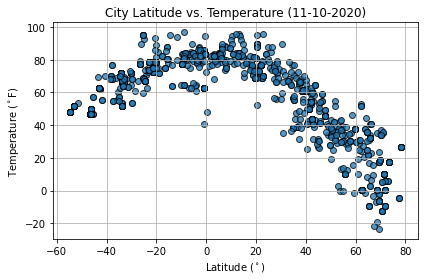

In [13]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output/fig1.png")
plt.show()

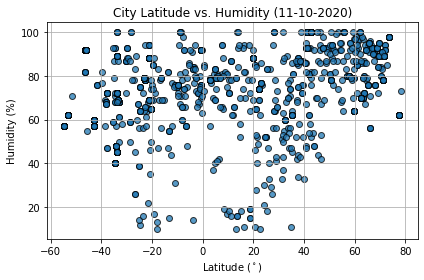

In [34]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig2.png")
plt.show()

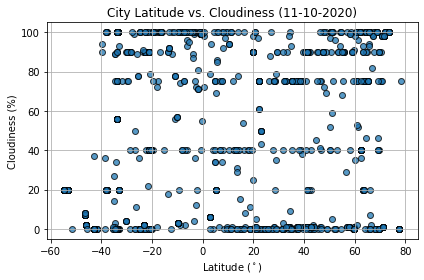

In [35]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig3.png")
plt.show()

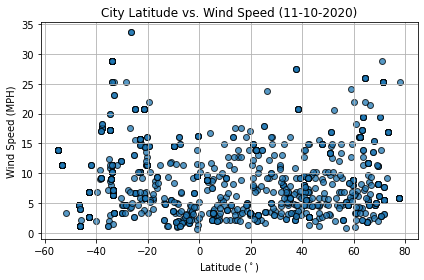

In [36]:
# create scatter plots with lattidudes against temp, humidity, cloudiness and wind speed 
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("output/fig4.png")
plt.show()

In [37]:
# OBSERVATIONS:
# It seems that city temps are hotter near the equator.(First Graph Latidude vs Temp).

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

In [39]:

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.9


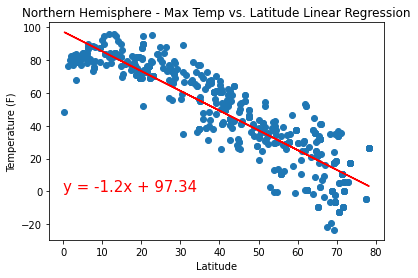

In [21]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Temperature (F)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output/NortHemispere-MaxTempv-LLR.png")



The r-squared is : 0.21


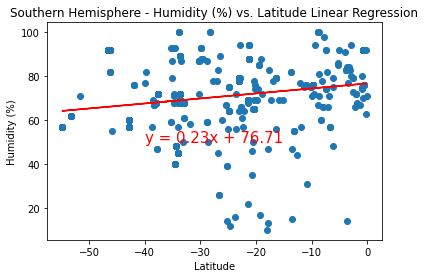

In [40]:
#Southern Hemisphere - Temp vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity (%)"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/SouthHemisphere-Humidity-LLR.png")


The r-squared is : 0.15


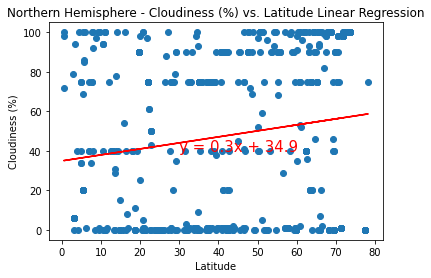

In [41]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness (%)"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/NorthernHemisphere-Cloudiness-LLR.png")

The r-squared is : 0.48


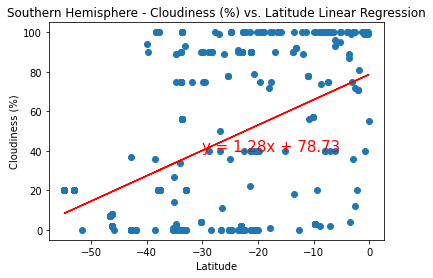

In [42]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness (%)"])
annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/SouthernHemisphere-Cloudiness-LLR.png")

The r-squared is : 0.2


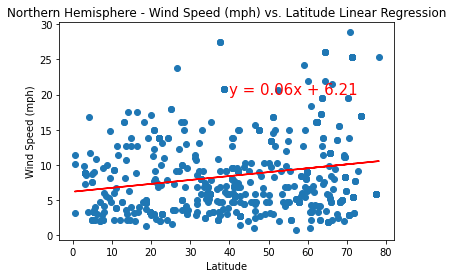

In [43]:

equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed (MPH)"])

annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/NorthernHemisphere-WindSeed-LLR")

The r-squared is : -0.1


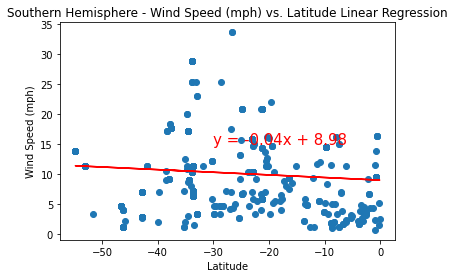

In [44]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed (MPH)"])
annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/SouthernHemisphere-WindSpeed-LLR.png")